<a href="https://colab.research.google.com/github/piyush1856/Business-Case-OLA-Ensemble-Learning/blob/main/Business_Case_OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Driver attrition poses significant challenges to ride-hailing platforms like OLA, impacting operational efficiency and customer satisfaction. Predicting and mitigating driver turnover is crucial for maintaining a stable and efficient workforce. This case study focuses on leveraging ensemble learning techniques to develop a robust predictive model for driver attrition.

By employing methods such as bagging and boosting, the objective is to harness the power of advanced machine learning algorithms to achieve higher predictive accuracy. The dataset includes driver demographics, tenure information, and performance metrics, which will be analyzed through exploratory data analysis, preprocessing, and feature engineering.

This study aims to deliver actionable insights and a reliable predictive model that can support strategic decision-making for managing driver retention effectively.

# **Background**

The ride-hailing industry has revolutionized transportation, offering convenience and flexibility to millions of customers globally. However, driver attrition remains one of the most critical challenges for companies like OLA. High turnover rates lead to increased recruitment and training costs, reduced service reliability, and a compromised customer experience.

Driver attrition is often influenced by a combination of factors, including demographic characteristics, work performance, and job tenure. Understanding these factors and predicting attrition early is vital for implementing proactive strategies to retain drivers and ensure operational stability.

Traditional machine learning models often fall short in capturing complex patterns within data. Ensemble learning, which combines multiple models to improve predictive accuracy and robustness, offers a promising solution to this challenge. Techniques like bagging and boosting can enhance model performance by addressing issues such as overfitting, bias, and variance.

This case study aims to explore the application of ensemble learning to predict driver attrition accurately, offering insights that can help OLA retain its workforce and maintain a competitive edge in the industry.

# **Concepts Used**

To address the challenge of predicting driver attrition effectively, the following concepts and methodologies are employed in this case study:  

1. **Exploratory Data Analysis (EDA):**  
   EDA involves examining the dataset to uncover patterns, trends, and relationships among features. It also helps identify missing values, outliers, and potential data quality issues.  

2. **Data Preprocessing:**  
   - **KNN Imputation:** Used to handle missing values by imputing them based on the nearest neighbors.  
   - **Feature Engineering:** Creation of new, meaningful features or transformation of existing ones to improve model performance.  
   - **Class Imbalance Treatment:** Techniques like oversampling, undersampling, or Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset.  
   - **Standardization:** Scaling features to have zero mean and unit variance to ensure uniformity, especially important for models sensitive to feature magnitudes.  
   - **Encoding:** Converting categorical variables into numerical format using techniques like one-hot encoding or label encoding.  

3. **Ensemble Learning:**  
   Ensemble learning methods are applied to enhance the predictive power of the model:  
   - **Bagging:** Techniques such as Random Forest aggregate predictions from multiple decision trees to reduce variance and improve robustness.  
   - **Boosting:** Algorithms like Gradient Boosting or AdaBoost iteratively focus on correcting errors made by previous models, reducing bias and improving accuracy.  

4. **Model Evaluation:**  
   Evaluation metrics such as precision, recall, F1-score, and ROC-AUC are used to assess model performance. Special emphasis is placed on precision and recall to ensure a balanced trade-off between false positives and false negatives.  

5. **Insights and Recommendations:**  
   Based on the model’s predictions and analysis of important features, actionable recommendations are provided to mitigate driver attrition.  


# **Dataset Explanation**

The `ola_driver.csv` dataset includes features describing driver attributes, performance, and tenure. Below is a detailed explanation of the columns:

1. **MMMM-YY:** Reporting month and year.  
2. **Driver_ID:** A unique identifier assigned to every driver.  
3. **Age:** Age of the driver.  
4. **Gender:** Driver's gender (Male: `0`, Female: `1`).  
5. **City:** City code representing the city where the driver operates.  
6. **Education_Level:** Education level of the driver, categorized as:  
   - `0`: 10+  
   - `1`: 12+  
   - `2`: Graduate  
7. **Income:** Average monthly income of the driver.  
8. **Date Of Joining:** The date when the driver joined Ola.  
9. **LastWorkingDate:** The most recent or final day the driver worked with Ola.  
10. **Joining Designation:** The designation of the driver at the time of joining Ola.  
11. **Grade:** A grade assigned to the driver at the reporting time, likely representing performance or other metrics.  
12. **Total Business Value:** The total monetary value (business) a driver contributes in a month. Negative values might indicate cancellations, refunds, or other financial adjustments.  
13. **Quarterly Rating:** The driver's rating on a quarterly basis, ranging from `1` to `5` (with `5` being the best).  

This dataset provides essential details to analyze and predict driver attrition using ensemble learning techniques.


# **Import Libraries**

In [7]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Handling dates
from datetime import datetime

# Statistics
from scipy.stats import shapiro

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Ensemble learning methods
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/dist-packages/sklearn/exceptions.py)

# **Define Problem Statement and perform Exploratory Data Analysis**

## **Definition of Problem**

Ola is a prominent player in the ride-hailing industry, relying heavily on its driver base to ensure consistent operations and meet customer demand. However, driver attrition poses a significant challenge, leading to operational disruptions, increased recruitment costs, and potential customer dissatisfaction.

The objective of this case study is to build a predictive model to identify drivers who are at risk of leaving the platform. By leveraging historical driver data, the model aims to:

- Proactively address attrition concerns by identifying at-risk drivers.
- Enable strategic interventions, such as targeted incentives or training, to retain drivers.
- Maintain a consistent and reliable driver base, ensuring business continuity and customer satisfaction.

The ability to predict driver churn is critical for Ola to stay competitive in the dynamic ride-hailing market while minimizing costs associated with driver turnover.


## **Observations on Data**

In [ ]:
# Load the CSV file from the URL
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv"
df = pd.read_csv(url)

In [ ]:
# Displaying the first few rows of the dataset to check the structure
df.head()

In [ ]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.sample(10)

In [ ]:
# Shape of data
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

In [ ]:
# Overview
df.info()

In [ ]:
# Statistical Summary
df.describe()

### **Statistical Summary Inference**

- **Age**: The average age of drivers is around 34.67 years, with a minimum of 21 years and a maximum of 58 years.
- **Gender**: The dataset shows a higher number of male drivers (mean value of 0.42 for gender).
- **Education Level**: The majority of drivers have completed their schooling (Education Level = 0 or 1).
- **Income**: The average monthly income of drivers is approximately 65,652 with a wide range (from 10,747 to 188,418).
- **Total Business Value**: There's significant variation in drivers' total business value, with some negative values, indicating possible refunds or cancellations.
- **Quarterly Rating**: The most frequent rating is 2, with a minimum of 1 and maximum of 4, reflecting the variance in driver performance.


## **Datatype Conversion**

In [ ]:
## Converting 'MMM-YY' feature to datetime type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

## Converting 'Dateofjoining' feature to datetime type
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

## Converting 'LastWorkingDate' feature to datetime type
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
# Converting to categorical columns
categorical_columns = ["City", "Education_Level", "Joining Designation", "Grade"]
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [ ]:
df.dtypes

## **Missing Value Detection and Treatment**

In [ ]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

In [ ]:
# Select only numeric columns and exclude 'Driver_ID'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_for_imputation = numeric_columns.drop('Driver_ID')
columns_for_imputation

In [ ]:
# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Apply the imputer to the selected columns
imputed_data = knn_imputer.fit_transform(df[columns_for_imputation])

In [ ]:
# Replace the imputed values back into the DataFrame
df[columns_for_imputation] = imputed_data

In [ ]:
# Convert 'Gender' back to categorical
df['Gender'] = pd.Categorical(df['Gender'].round().astype(int))

In [ ]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

In the context of the dataset, the `LastWorkingDate` column represents the most recent or final day a driver worked with Ola. It is important to note that the `LastWorkingDate` column will only contain missing values (`NaN`) for drivers who are still active, as they haven't yet had a last working day recorded.

## **Target Variable Creation**

In [ ]:
# Creating Target Variable
df['Is_Churned'] = df['LastWorkingDate'].notnull().astype('category')

In [ ]:
df.head()

## **Creation of Aggregated Datasets**

In [ ]:
aggregation_dict = {
    'Age': 'max',                     # Use the maximum age in the period (driver's age is unlikely to change)
    'Gender': 'first',                # Gender remains constant, so first value in the group is used
    'City': 'first',                  # City is generally constant, so the first recorded city is used
    'Education_Level': 'last',        # Education level is typically unchanged or select latest, use the last value
    'Income': 'last',                 # Retain the most recent income value for the driver
    'Dateofjoining': 'last',          # Date of joining is fixed for each driver, but we'll take the most recent value in case of multiple records
    'LastWorkingDate': 'last',        # Keep the most recent working date, NaT will be retained for inactive periods
    'Joining Designation': 'last',    # Designation generally doesn't change often, use the most recent designation
    'Grade': 'last',                  # Grade can change, so we take the most recent grade
    'Total Business Value': 'sum',    # Summing the total business value across periods
    'Quarterly Rating': 'last',       # The last quarterly rating will give the most up-to-date rating
    'Is_Churned': 'last'              # The churn flag will be taken from the last record (if a driver churned, this will be 1)
}

# Apply grouping based on Driver_ID and MMM-YY, then aggregate according to the aggregation_dict
df_agg_driver_id_and_reporting = df.groupby(['Driver_ID', 'MMM-YY']).aggregate(aggregation_dict)

# Sort the data by Driver_ID and MMM-YY
df_agg_driver_id_and_reporting = df_agg_driver_id_and_reporting.sort_index(ascending=[True,True])
df_agg_driver_id_and_reporting = df_agg_driver_id_and_reporting.reset_index()
df_agg_driver_id_and_reporting.head()

In [ ]:
# Aggregation dictionary for further aggregation on the already grouped data
function_dict = {
    'Age': 'mean',                    # Average age of the driver over all months
    'Gender': 'first',                # First gender encountered (as gender is unlikely to change)
    'City': 'first',                  # First city recorded for the driver
    'Education_Level': 'last',        # Most recent education level
    'Income': 'mean',                 # Average income over time
    'Joining Designation': 'last',    # Most recent joining designation
    'Grade': 'last',                  # Most recent grade achieved
    'Total Business Value': 'sum',    # Total business value over all months
    'Quarterly Rating': 'mean',       # Average quarterly rating over time
    'Is_Churned': 'last',             # Churn status (the last value will indicate if the driver churned)
    'Dateofjoining': 'last',          # Most recent joining date
    'LastWorkingDate': 'last'         # Most recent working date (NaT if no working)
}

# Apply secondary aggregation on the already grouped data
final_aggregated_data = df_agg_driver_id_and_reporting.groupby('Driver_ID').agg(function_dict)

In [ ]:
# Drop 'Driver_ID' and reset the index
final_aggregated_data = final_aggregated_data.reset_index()

In [ ]:
final_aggregated_data.head()

## **Univariate Analysis**

### **Continuous Variables**

In [ ]:
# List of continuous variables in the current dataset
continuous_vars = [
    "Age", "Income", "Total Business Value", "Quarterly Rating"
]

# Number of rows and columns for subplots
n_cols = 2
n_rows = (len(continuous_vars) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.histplot(data=final_aggregated_data, x=var, kde=True, bins=30, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Inference and Recommendation**

> Distribution of Age

- **Inference**: The age distribution is right-skewed, with the majority of individuals falling between the ages of 25 and 40. The peak frequency is around the age of 30.
- **Recommendation**: Target marketing and services towards individuals aged 25-40, as they represent the largest demographic group.

> Distribution of Income

- **Inference**: The income distribution is also right-skewed, with most individuals earning between 25,000 and 75,000. The peak frequency is around 50,000.
- **Recommendation**: Focus financial products and services on individuals earning between 25,000 and 75,000, as they constitute the majority of the population.

> Distribution of Total Business Value

- **Inference**: The distribution of total business value is highly right-skewed, with a significant number of businesses having a low total business value. The majority of businesses have a total business value close to zero.
- **Recommendation**: Provide support and resources to small businesses with low total business value to help them grow and increase their market share.

> Distribution of Quarterly Rating

- **Inference**: The quarterly rating distribution is right-skewed, with most ratings clustered around 1.0. There are fewer businesses with higher ratings.
- **Recommendation**: Implement strategies to improve the quarterly ratings of businesses, such as customer service training and quality improvement programs.

### **Categorical Variables**

In [ ]:
# List of categorical variables
categorical_vars = ["Gender", "City", "Education_Level", "Joining Designation", "Grade", "Is_Churned"]

# Number of rows and columns for subplots
n_cols = 2
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(data=final_aggregated_data, x=var, ax=axes[i], palette="viridis", order=final_aggregated_data[var].value_counts().index)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Inference and Recommendation**

> Distribution of Gender

- **Inference**: The dataset has a higher count of individuals with Gender labeled as '0' compared to '1'.
- **Recommendation**: Ensure gender diversity in the dataset by balancing the representation of different genders.

> Distribution of City

- **Inference**: The distribution of individuals across different cities is uneven, with some cities having significantly higher counts than others.
- **Recommendation**: Investigate the reasons for the uneven distribution and consider strategies to achieve a more balanced representation across cities.

> Distribution of Education Level

- **Inference**: The Education Level attribute is fairly evenly distributed across the three categories.
- **Recommendation**: Maintain the current balance in education levels, but also consider if additional education levels should be included to capture a broader range of educational backgrounds.

> Distribution of Joining Designation

- **Inference**: The majority of individuals joined at designation '1', with decreasing counts for higher designations.
- **Recommendation**: Evaluate the criteria for joining designations and consider if the distribution aligns with organizational goals and employee career progression.

> Distribution of Grade

- **Inference**: Most individuals are in Grade '2', followed by '3', '4', and very few in '5'.
- **Recommendation**: Assess the grading system to ensure it accurately reflects employee performance and potential. Consider providing support and development opportunities for individuals in lower grades.

> Distribution of Is_Churned

- **Inference**: A higher count of individuals have not churned (True) compared to those who have churned (False).
- **Recommendation**: Analyze the factors contributing to churn and implement retention strategies to reduce the churn rate further.


## **Bivariate Analysis**

### **Continuous vs. Continuous**

In [ ]:
# List of continuous variables in the current dataset
continuous_vars = [
    "Age", "Income", "Total Business Value", "Quarterly Rating"
]

# Number of rows and columns for subplots
n_cols = 3
n_rows = (len(continuous_vars) * (len(continuous_vars) - 1)) // 6

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create pairwise plots for continuous variables
plot_idx = 0
for i in range(len(continuous_vars)):
    for j in range(i + 1, len(continuous_vars)):
        sns.scatterplot(x=final_aggregated_data[continuous_vars[i]], y=final_aggregated_data[continuous_vars[j]], ax=axes[plot_idx])
        axes[plot_idx].set_title(f"{continuous_vars[i]} vs {continuous_vars[j]}")
        axes[plot_idx].set_xlabel(continuous_vars[i])
        axes[plot_idx].set_ylabel(continuous_vars[j])
        plot_idx += 1

# Remove unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Inference and Recommendation**

> Age vs Income

- **Inference**: The scatter plot of Age vs Income shows a positive correlation, indicating that as age increases, income tends to increase as well.
- **Recommendation**: Consider implementing age-specific financial planning and career development programs to help individuals maximize their income potential as they age.

> Age vs Total Business Value

- **Inference**: The scatter plot of Age vs Total Business Value does not show a strong correlation, suggesting that age may not be a significant factor in determining total business value.
- **Recommendation**: Focus on other factors that may influence total business value, such as industry type, business strategy, and market conditions.

> Age vs Quarterly Rating

- **Inference**: The scatter plot of Age vs Quarterly Rating shows no clear correlation, indicating that quarterly ratings are not significantly influenced by age.
- **Recommendation**: Investigate other factors that may impact quarterly ratings, such as customer satisfaction, product quality, and service efficiency.

> Income vs Total Business Value

- **Inference**: The scatter plot of Income vs Total Business Value shows a positive correlation, suggesting that higher income is associated with higher total business value.
- **Recommendation**: Develop programs to support income growth for businesses, such as financial consulting, investment opportunities, and revenue optimization strategies.

> Income vs Quarterly Rating

- **Inference**: The scatter plot of Income vs Quarterly Rating shows no clear correlation, indicating that quarterly ratings are not significantly influenced by income.
- **Recommendation**: Explore other factors that may affect quarterly ratings, such as customer feedback, employee performance, and operational processes.

> Total Business Value vs Quarterly Rating

- **Inference**: The scatter plot of Total Business Value vs Quarterly Rating shows no clear correlation, suggesting that total business value does not significantly impact quarterly ratings.
- **Recommendation**: Focus on improving factors that directly influence quarterly ratings, such as customer experience, product development, and marketing efforts.

### **Categorical vs. Categorical**

In [ ]:
# List of categorical variables in the current dataset
categorical_vars = [
    "City", "Gender", "Education_Level", "Joining Designation", "Grade", "Is_Churned"
]

# Calculate all pairwise combinations of the categorical variables
combinations = list(itertools.combinations(categorical_vars, 2))

# Separate combinations involving "City" and others
city_combinations = [combo for combo in combinations if "City" in combo]
other_combinations = [combo for combo in combinations if "City" not in combo]

# Create subplots for combinations involving "City" (one plot per row)
for combinations_list, n_cols in [(city_combinations, 1), (other_combinations, 2)]:
    # Calculate rows and columns for subplots dynamically
    n_rows = (len(combinations_list) + n_cols - 1) // n_cols  # Calculate rows based on combinations count

    # Create subplots with a larger figure size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Flatten the axes for easy iteration
    axes = axes.flatten()

    # Create count plots
    for plot_idx, (var1, var2) in enumerate(combinations_list):
        # Create the count plot
        sns.countplot(data=final_aggregated_data, x=var1, hue=var2, ax=axes[plot_idx], palette='Set2')

        # Set titles and labels
        axes[plot_idx].set_title(f"{var1} vs {var2}", fontsize=14)
        axes[plot_idx].set_xlabel(var1, fontsize=12)
        axes[plot_idx].set_ylabel("Count", fontsize=12)

    # Remove unused subplots if any
    for j in range(len(combinations_list), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


#### **Inference and Recommendation**

> **City vs Gender**

- **Inference**: The distribution of gender (0: Male, 1: Female) varies across cities, with some cities like C8 having a higher female population compared to others.
- **Recommendation**: Tailor policies and workplace inclusivity programs to ensure gender balance, especially in cities with notable disparities.

> **City vs Education Level**

- **Inference**: Education levels (0: Basic, 1: Intermediate, 2: Advanced) are distributed unevenly across cities, with some cities showing a concentration of employees with advanced education levels.
- **Recommendation**: Leverage cities with higher education levels for roles requiring specialized skills.

> **City vs Joining Designation**

- **Inference**: Different joining designations (1 to 5) are concentrated in specific cities, with cities like C20 having a higher representation across various designations.
- **Recommendation**: Use cities with diverse designation distributions as hubs for cross-functional teams or leadership development programs.

> **City vs Grade**

- **Inference**: The distribution of grades (1 to 5) varies by city, with some cities like C20 showing a higher number of employees in higher grades.
- **Recommendation**: Focus on cities with higher grades for critical projects and provide training opportunities in cities with lower-grade distributions.

> **City vs Is_Churned**

- **Inference**: Employee churn is higher in certain cities like C20, indicating potential dissatisfaction or external factors influencing retention.
- **Recommendation**: Conduct detailed surveys in cities with high churn rates to identify issues and implement retention strategies, such as better incentives or work-life balance initiatives.

> **Gender vs Education Level**

- **Inference**: Males (Gender = 0) and females (Gender = 1) have similar distributions across education levels (0: Basic, 1: Intermediate, 2: Advanced), with a slightly higher count of males in advanced education levels.
- **Recommendation**: Promote equal opportunities for education advancement, particularly for females, to achieve a more balanced workforce.

> **Gender vs Joining Designation**

- **Inference**: Males dominate higher joining designations (e.g., 3, 4, and 5), whereas females are more concentrated in lower designations (1 and 2).
- **Recommendation**: Encourage leadership training and mentoring programs for females to improve representation in higher designations.

> **Gender vs Grade**

- **Inference**: Males are more prevalent in higher grades, while females are concentrated in lower grades.
- **Recommendation**: Create skill development and grade promotion programs to enhance female representation in higher grades.

> **Gender vs Is_Churned**

- **Inference**: Both genders show significant churn, but males have a higher churn rate compared to females.
- **Recommendation**: Investigate reasons for male churn and implement retention strategies such as flexible work options and better career growth pathways.

> **Education Level vs Joining Designation**

- **Inference**: Employees with advanced education (2) tend to occupy higher designations (e.g., 3, 4, 5), while basic education (0) is concentrated in lower designations.
- **Recommendation**: Focus on recruiting highly educated individuals for roles requiring higher designations and provide upskilling opportunities for existing employees.

> **Education Level vs Grade**

- **Inference**: Advanced education levels correlate with higher grades, while lower education levels are more concentrated in lower grades.
- **Recommendation**: Invest in continuous education and certification programs to enable career progression across all grades.

> **Education Level vs Is_Churned**

- **Inference**: Churn rates are relatively high across all education levels, with no significant variation.
- **Recommendation**: Implement universal employee engagement programs focusing on job satisfaction, regardless of education level.

> **Joining Designation vs Grade**

- **Inference**: Higher grades are typically associated with higher joining designations, while lower grades are concentrated in designations 1 and 2.
- **Recommendation**: Provide structured career progression paths from lower designations to motivate employees and reduce stagnation.

> **Joining Designation vs Is_Churned**

- **Inference**: Churn is notably high for lower joining designations (1 and 2), while it decreases for higher designations.
- **Recommendation**: Focus on retention initiatives for lower designation employees, such as role enrichment and better compensation.

> **Grade vs Is_Churned**

- **Inference**: Churn is highest among employees in lower grades (1 and 2), while it decreases for higher grades.
- **Recommendation**: Improve support systems and growth opportunities for employees in lower grades to reduce churn.


### **Categorical vs. Continuous**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Lists of categorical and continuous variables
categorical_vars = [
    "City", "Gender", "Education_Level", "Joining Designation", "Grade", "Is_Churned"
]
continuous_vars = ["Age", "Income", "Total Business Value", "Quarterly Rating"]

# Generate combinations of categorical and continuous variables
combinations = list(itertools.product(categorical_vars, continuous_vars))

# Separate combinations involving "City" (1 plot per row) from others (2 plots per row)
city_combinations = [combo for combo in combinations if combo[0] == "City"]
other_combinations = [combo for combo in combinations if combo[0] != "City"]

# Create function to plot based on dynamic layout
def plot_combinations(combinations_list, n_cols):
    n_rows = (len(combinations_list) + n_cols - 1) // n_cols  # Calculate required rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), squeeze=False)
    axes = axes.flatten()  # Flatten axes for iteration

    for plot_idx, (cat_var, cont_var) in enumerate(combinations_list):
        sns.boxplot(data=final_aggregated_data, x=cat_var, y=cont_var, ax=axes[plot_idx], palette="Set2")
        axes[plot_idx].set_title(f"{cont_var} by {cat_var}", fontsize=14)
        axes[plot_idx].set_xlabel(cat_var, fontsize=12)
        axes[plot_idx].set_ylabel(cont_var, fontsize=12)
        axes[plot_idx].tick_params(axis="x", rotation=45)

    # Remove unused subplots
    for i in range(len(combinations_list), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Plot for City combinations (1 plot per row)
plot_combinations(city_combinations, n_cols=1)

# Plot for other combinations (2 plots per row)
plot_combinations(other_combinations, n_cols=2)

#### **Inference and Recommendation**

> **Age Distribution by City**

- **Inference**: The age distribution varies significantly across cities, with some cities having younger populations (lower median age) and others having older populations (higher median age). Cities like C1 and C2 have relatively younger populations compared to cities like C19 and C20.
- **Recommendation**: Tailor services, products, and marketing strategies to the age demographics of each city. For cities with younger populations, focus on products and services that cater to younger age groups. For cities with older populations, prioritize products and services that cater to older age groups.

> **Income Distribution by City**

- **Inference**: The income distribution shows considerable variation across cities. Some cities, like C5 and C8, have higher median incomes, while others, like C12 and C15, have lower median incomes.
- **Recommendation**: Develop income-specific strategies for each city. For cities with higher median incomes, offer premium products and services. For cities with lower median incomes, provide affordable options and financial assistance programs.

> **Total Business Value by City**

- **Inference**: The total business value distribution indicates that some cities, such as C3 and C10, have businesses with higher overall values, while cities like C6 and C11 have businesses with lower overall values.
- **Recommendation**: Support business growth in cities with lower total business values by providing incentives, grants, and resources. In cities with higher total business values, focus on sustaining and enhancing business performance through advanced business solutions and innovation.

> **Quarterly Rating Distribution by City**

- **Inference**: The quarterly rating distribution shows variation across cities, with some cities like C4 and C7 having higher median quarterly ratings and others like C9 and C14 having lower median ratings.
- **Recommendation**: Implement quality improvement programs and customer feedback mechanisms in cities with lower quarterly ratings to enhance business performance. For cities with higher quarterly ratings, maintain high standards and recognize exemplary performance.

> **Age by Gender**

- **Inference**: The age distribution is relatively similar between genders, with both exhibiting a median age of around 30–35 years.
- **Recommendation**: Maintain unbiased age-related policies for both genders and ensure equal opportunities for professional development.

> **Income by Gender**

- **Inference**: Males (Gender = 0) exhibit slightly higher median income levels than females (Gender = 1).
- **Recommendation**: Address gender income disparity by reviewing pay structures and ensuring equal pay for equal roles and contributions.

> **Total Business Value by Gender**

- **Inference**: Males tend to contribute more to total business value on average than females.
- **Recommendation**: Identify and bridge skill gaps for females through training to enhance their contribution to business performance.

> **Quarterly Rating by Gender**

- **Inference**: Gender does not show a significant impact on quarterly ratings; the median ratings are consistent across genders.
- **Recommendation**: Continue evaluating performance based on merit and avoid any potential gender biases.

> **Age by Education Level**

- **Inference**: Higher education levels (2) tend to be associated with slightly older employees, while lower levels (0) are common among younger employees.
- **Recommendation**: Encourage younger employees to pursue advanced education through incentives and scholarships.

> **Income by Education Level**

- **Inference**: Income increases with education level, with employees at education level 2 earning the highest median income.
- **Recommendation**: Promote education advancement among employees to enable better earning potential and productivity.

> **Total Business Value by Education Level**

- **Inference**: Employees with higher education levels tend to contribute more to business value.
- **Recommendation**: Focus recruitment on individuals with advanced education and provide upskilling opportunities for existing employees.

> **Quarterly Rating by Education Level**

- **Inference**: Higher education levels are correlated with slightly better quarterly ratings, though the variation is minimal.
- **Recommendation**: Recognize and reward performance irrespective of education level to maintain a fair environment.

> **Age by Joining Designation**

- **Inference**: Higher joining designations (e.g., 4 and 5) are associated with older employees, while lower designations attract younger employees.
- **Recommendation**: Provide mentoring programs for younger employees in lower designations to prepare them for higher roles.

> **Income by Joining Designation**

- **Inference**: Income increases with joining designation, with higher designations earning significantly more.
- **Recommendation**: Create structured career paths to help employees in lower designations progress to higher income levels.

> **Total Business Value by Joining Designation**

- **Inference**: Employees in higher designations contribute more to total business value.
- **Recommendation**: Provide leadership and business training to lower designation employees to enhance their contributions.

> **Quarterly Rating by Joining Designation**

- **Inference**: Higher designations tend to receive slightly better quarterly ratings.
- **Recommendation**: Continue rewarding performance based on contribution while supporting underperforming designations.

> **Age by Grade**

- **Inference**: Higher grades are associated with slightly older employees, while lower grades have a younger age distribution.
- **Recommendation**: Facilitate professional development for younger employees to enable their transition to higher grades.

> **Income by Grade**

- **Inference**: Income increases significantly with grade, reflecting higher responsibility and expertise.
- **Recommendation**: Use income growth as a motivation for employees in lower grades and support their career advancement.

> **Total Business Value by Grade**

- **Inference**: Employees in higher grades contribute significantly more to business value than those in lower grades.
- **Recommendation**: Provide targeted training to employees in lower grades to boost their contribution to business performance.

> **Quarterly Rating by Grade**

- **Inference**: Higher grades correlate with slightly better quarterly ratings.
- **Recommendation**: Maintain performance evaluation systems and offer support for employees in lower grades.

> **Age by Is_Churned**

- **Inference**: Churned employees tend to have a slightly younger age distribution compared to retained employees.
- **Recommendation**: Introduce retention initiatives focusing on younger employees, such as mentorship programs and growth opportunities.

> **Income by Is_Churned**

- **Inference**: Churned employees have a slightly lower median income compared to retained employees.
- **Recommendation**: Improve compensation packages for roles prone to churn to enhance employee retention.

> **Total Business Value by Is_Churned**

- **Inference**: Retained employees contribute significantly more to total business value than those who have churned.
- **Recommendation**: Focus retention strategies on high-performing employees to safeguard business performance.

> **Quarterly Rating by Is_Churned**

- **Inference**: Retained employees have higher quarterly ratings compared to those who have churned.
- **Recommendation**: Use performance ratings as an indicator to identify employees at risk of churning and address their concerns proactively.


## **Correlation Analysis**

In [ ]:
# Select only numeric columns from the DataFrame
numeric_columns = final_aggregated_data[continuous_vars]

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Inference and Recommendation**

> Age

- **Inference**: Age has a weak positive correlation with Income (0.20), Total Business Value (0.23), and Quarterly Rating (0.20).
- **Recommendation**: While age shows some positive correlation with other variables, it is not a significant factor. Focus on other variables that show stronger correlations for strategic planning.

> Income

- **Inference**: Income has a weak positive correlation with Age (0.20) and Quarterly Rating (0.19), and a moderate positive correlation with Total Business Value (0.37).
- **Recommendation**: Strategies to increase income could potentially lead to an increase in total business value. Consider initiatives that target both income growth and business value enhancement.

> Total Business Value

- **Inference**: Total Business Value has a moderate positive correlation with Income (0.37) and a strong positive correlation with Quarterly Rating (0.71).
- **Recommendation**: Since Total Business Value and Quarterly Rating have a strong positive correlation, efforts to improve one are likely to positively impact the other. Focus on strategies that enhance both business value and quarterly ratings.

> Quarterly Rating

- **Inference**: Quarterly Rating has a strong positive correlation with Total Business Value (0.71) and weak positive correlations with Age (0.20) and Income (0.19).
- **Recommendation**: Improve quarterly ratings by focusing on factors that contribute to higher business value. Implement quality improvement programs and gather customer feedback to enhance overall ratings.


## **Outlier Treatment**

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(final_aggregated_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### **Inference and Recommendation**

> Boxplot of Age

- **Inference**: The median age is around 35, with most individuals falling within the interquartile range of 30 to 40. There are several outliers above the age of 50.
- **Recommendation**: Tailor services and products primarily to individuals in their 30s, but also consider offerings for older individuals to address their unique needs and preferences.

> Boxplot of Income

- **Inference**: The median income is approximately 75,000, with the interquartile range spanning from 50,000 to 100,000. There are numerous outliers with incomes above 150,000.
- **Recommendation**: Develop premium products and services for higher-income individuals while ensuring affordability and value for the median income group.

> Boxplot of Total Business Value

- **Inference**: The median total business value is close to zero, with the interquartile range between approximately 0 and 2,000,000. There are many outliers, with values reaching up to 8,000,000.
- **Recommendation**: Support small businesses with low total values by providing resources and incentives for growth. Additionally, offer specialized services for high-value businesses to sustain and enhance their performance.

> Boxplot of Quarterly Rating

- **Inference**: The median quarterly rating is around 1.5, with the interquartile range between approximately 1.0 and 2.0. Several outliers have ratings above 3.5.
- **Recommendation**: Investigate the factors contributing to high ratings and replicate these practices across the board. Implement quality improvement programs and gather customer feedback to enhance overall ratings.


### **Why Outlier Treatment is Not Applied**

Outlier treatment is not applied because decision tree-based ensemble methods, such as Random Forest and Gradient Boosting, are robust to outliers. These algorithms split data based on thresholds, making them less sensitive to extreme values. Removing or capping outliers may lead to the loss of critical information, potentially reducing model performance. Hence, preserving the original data distribution ensures better predictive accuracy.

# **Data Preprocessing**

## **Duplicate Value Check**

In [ ]:
# Checking the number of duplicate for all the features
duplicate_records = final_aggregated_data[final_aggregated_data.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")

## **Missing Value Treatment**

In [ ]:
# Getting count of null/missing values in dataset
null_values = final_aggregated_data.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values[null_values['null_count']>0]

>We will treat nulls in `LastWorkingDate` in feature engineering section after extracting some useful information from this column.

## **Feature Engineering**

### **Extracting Feature from Date Columns**

In [ ]:
def extract_date_features(df, date_column, prefix):
    """
    Extracts features like month, year, quarter, and week from a date column.
    Handles NaT values by replacing them with -1.

    Args:
        df (pd.DataFrame): The DataFrame containing the date column.
        date_column (str): The name of the date column.
        prefix (str): The prefix for the new feature columns.

    Returns:
        pd.DataFrame: The DataFrame with new feature columns added.
    """
    df[f'{prefix}_Month'] = df[date_column].apply(lambda x: x.month if pd.notna(x) else -1)
    df[f'{prefix}_Year'] = df[date_column].apply(lambda x: x.year if pd.notna(x) else -1)
    df[f'{prefix}_Quarter'] = df[date_column].apply(lambda x: x.quarter if pd.notna(x) else -1)
    df[f'{prefix}_Week'] = df[date_column].apply(lambda x: x.isocalendar()[1] if pd.notna(x) else -1)
    df.drop(columns=[date_column], inplace=True)
    return df

In [ ]:
# Extract features from 'Dateofjoining' and 'LastWorkingDate' for df_agg_driver_id_and_reporting
df_agg_driver_id_and_reporting = extract_date_features(
    df_agg_driver_id_and_reporting, 'Dateofjoining', 'Joining'
)
df_agg_driver_id_and_reporting = extract_date_features(
    df_agg_driver_id_and_reporting, 'LastWorkingDate', 'LastWorking'
)

# Extract features from 'Dateofjoining' and 'LastWorkingDate' for final_aggregated_data
final_aggregated_data = extract_date_features(
    final_aggregated_data, 'Dateofjoining', 'Joining'
)
final_aggregated_data = extract_date_features(
    final_aggregated_data, 'LastWorkingDate', 'LastWorking'
)

### **Extracting Feature on the basis of trend line**

In [ ]:
def mark_increased_values_with_trend_line_dynamic(df_agg, df_final, column_name):
    """
    Function to identify Driver_IDs where the values in a specified column
    have increased based on linear regression (trend line).

    Parameters:
    - df_agg: DataFrame with aggregated driver data.
    - df_final: DataFrame with final aggregated data.
    - column_name: The name of the column to check for increasing values.

    Returns:
    - df_final: The final dataframe with an added column indicating whether the values have increased.
    """

    increased_driver_ids = []  # List to store Driver_IDs where the trend line slope is positive

    # Iterate over unique Driver_IDs
    for driver_id in df_agg['Driver_ID'].unique():
        # Filter the data for the current Driver_ID
        driver_data = df_agg[df_agg['Driver_ID'] == driver_id]

        # Create the feature (index) and target (values) for the regression model
        X = np.array(range(len(driver_data))).reshape(-1, 1)  # Time index (0, 1, 2, ... ordered by time)
        y = driver_data[column_name].values  # The target column values

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Check if the slope (coefficient) is positive
        if model.coef_[0] > 0:  # Positive slope means the values are increasing
            increased_driver_ids.append(driver_id)

    # Dynamically print the count of drivers with increasing values
    print(f"Number of Driver_IDs with increasing {column_name}: {len(increased_driver_ids)}")

    # Add the result to the final dataframe
    df_final[f'is_{column_name}_increased'] = df_final['Driver_ID'].apply(
        lambda x: x in increased_driver_ids
    )

    return df_final

In [ ]:
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Total Business Value')
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Quarterly Rating')
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Income')
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Grade')

In [ ]:
final_aggregated_data.sample(5)

## **Data Preparation for Modeling**

### **Datatype Conversion to numeric**

In [ ]:
binary_columns = ['Gender', 'Is_Churned',
                  'is_Quarterly Rating_increased', 'is_Income_increased',
                  'is_Grade_increased', 'is_Total Business Value_increased']
for col in binary_columns:
    final_aggregated_data[col] = final_aggregated_data[col].astype(int)

In [ ]:
categorical_columns = ["Education_Level", "Joining Designation", "Grade"]

# Convert categorical columns to integer
for col in categorical_columns:
    final_aggregated_data[col] = final_aggregated_data[col].cat.codes

### **Encoding**

In [ ]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding on the 'City' column as decision tree based model can handle it
final_aggregated_data['City'] = le.fit_transform(final_aggregated_data['City'])

In [ ]:
final_aggregated_data.head()

## **Identify normal vs skewed**

In [ ]:
# Perform Shapiro-Wilk test for normality
for column in final_aggregated_data.columns:
    stat, p_value = shapiro(final_aggregated_data[column])
    if p_value > 0.05:
        print(f"{column} follows a normal distribution.")
    else:
        print(f"{column} is not normal.")

# **Model Building**

## **Train-Test Split**

In [ ]:
# Define features (X) and target (y)
X = final_aggregated_data.drop(columns=['Driver_ID', 'Is_Churned'])  # Dropping 'Driver_ID' and target column
y = final_aggregated_data['Is_Churned']  # Target variable

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Show the shape of the resulting datasets
print(f"Training data shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test data shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

## **Data Normalization/Standardization**

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to DataFrame, preserving the column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# For the test data, just transform it using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame, preserving the column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled_df.head()

## **Handling Class Imbalance**

In [ ]:
# Count the instances of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=1)

# Apply SMOTE only to the training data
X_train_scaled_df, y_train = smote.fit_resample(X_train_scaled_df, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train.value_counts())

## **Ensemble Learning: Bagging**

### **Random Forest Classifier**

In [116]:
# Initialize the model
rf = RandomForestClassifier()

In [117]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [3, 5, 7, 10],
    'max_features': ['log2', 'sqrt'],
    'max_samples': [0.7, 0.8, 0.9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'bootstrap': [True, False]
}

In [118]:
# Initialize the GridSearchCV with cross-validation (cv=5 means 5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# Fit grid search on the training data
grid_search.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 7, 10],
                         'max_features': ['log2', 'sqrt'],
                         'max_samples': [0.7, 0.8, 0.9],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 100]},
             scoring='recall')

In [119]:
# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'log2', 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [120]:
# Best model based on grid search
best_model = grid_search.best_estimator_

In [121]:
# Predict on test data
y_test_pred = best_model.predict(X_test_scaled_df)

In [122]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


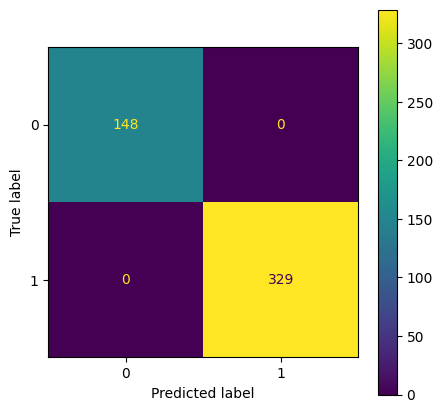

In [123]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)

In [124]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       329

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



#### **Model Performance Report: RandomForestClassifier (Test Dataset)**

> **Observations**

1. **Precision**: Both classes achieved perfect precision (1.00), indicating no false positives in the predictions.
2. **Recall**: Both classes achieved perfect recall (1.00), meaning all actual positives and negatives were correctly identified.
3. **F1-Score**: The F1-score of 1.00 for both classes indicates an ideal balance between precision and recall.
4. **Accuracy**: The overall accuracy of the model is 100%, meaning all samples were correctly classified.

> **Inference**

The RandomForestClassifier model performed perfectly on the evaluation data, with no misclassifications. While this level of performance is ideal in theory, it may indicate the model has either:
- Been trained on a dataset where the patterns are too simple or obvious, allowing the model to perfectly separate the classes.
- Potentially overfit to the training data, especially if the test data shares significant overlap with the training data or is not representative of unseen scenarios.

> **Recommendations**

1. Validate the model on an independent dataset to ensure the generalization capability.
2. Investigate the dataset for potential issues such as data leakage or an overly simplistic structure.
3. Consider applying cross-validation and evaluating the model on multiple folds to assess its robustness.


## **Ensemble Learning: Boosting**

### **Gradient Boosting Classifier**

In [125]:
# Initialize the model
gb_clf = GradientBoostingClassifier(random_state=21)

In [126]:
# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 75, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

In [127]:
# Initialize the GridSearchCV with cross-validation (cv=5 means 5-fold cross-validation)
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='recall')

# Fit grid search on the training data
grid_search_gb.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='recall')

In [128]:
# Get the best parameters
print("Best parameters:", grid_search_gb.best_params_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}


In [129]:
# Best model based on grid search
best_gb_model = grid_search_gb.best_estimator_

In [130]:
# Predict on test data
y_test_pred_gb = best_gb_model.predict(X_test_scaled_df)

In [131]:
# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print(f"Accuracy: {accuracy_gb}")

Accuracy: 1.0


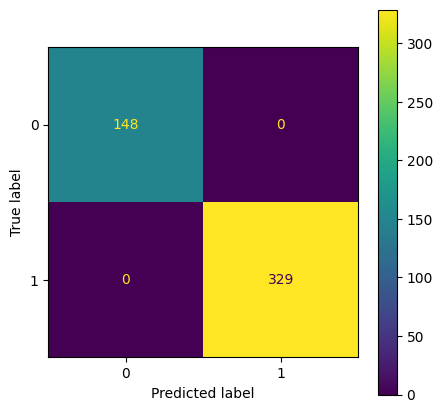

In [132]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_gb).plot(ax=ax)
plt.show()

In [133]:
# Classification report
class_report_gb = classification_report(y_test, y_test_pred_gb)
print("Classification Report:\n", class_report_gb)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       329

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



#### **Model Performance Report: GradientBoostingClassifier (Test Dataset)**

> **Observations**

1. **Precision**: The model achieved perfect precision (1.00) for both classes on the test dataset, indicating no false positives.
2. **Recall**: The recall is 1.00 for both classes, signifying that the model correctly identified all true positives without any false negatives.
3. **F1-Score**: The F1-score of 1.00 for both classes reflects an optimal balance between precision and recall.
4. **Accuracy**: The model achieved an overall accuracy of 100% on the test dataset, with no misclassifications.
5. **Macro Average**: The macro averages for precision, recall, and F1-score are all 1.00, indicating uniform performance across both classes.
6. **Weighted Average**: The weighted averages are also 1.00, confirming consistent performance even with imbalanced class sizes in the dataset.

> **Inference**

The GradientBoostingClassifier displayed perfect performance on the test dataset. While these results are impressive, they might indicate potential issues such as:
- Overfitting: The model might be memorizing patterns specific to the dataset rather than learning generalizable features.
- Simplicity: The dataset might contain easily separable patterns, making it straightforward for the model to achieve high performance.
- Data Leakage: There could be unintentional sharing of information between the training and test datasets.

> **Recommendations**

1. **Generalization Check**: Test the model on an independent validation dataset to confirm its performance on unseen data.
2. **Cross-Validation**: Employ k-fold cross-validation during training to ensure consistent performance across multiple splits of the data.
3. **Dataset Inspection**: Review the dataset for potential issues like data leakage, duplicate rows, or overly simplistic features that could influence results.
4. **Regularization**: Apply regularization techniques or limit the depth of trees to reduce the risk of overfitting if necessary.
5. **Real-World Testing**: Evaluate the model using real-world data to better understand its applicability and robustness in practical scenarios.


### **XGBoost**

In [5]:
# Initialize the XGBoost model
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=2)

NameError: name 'xgb' is not defined

In [168]:
# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [30, 50, 75, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

In [169]:
# Initialize the GridSearchCV with cross-validation (cv=5 means 5-fold cross-validation)
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit grid search on the training data
grid_search.fit(X_train_scaled_df, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
best_xgb_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

In [ ]:
# Predict on test data
y_test_pred = best_xgb_model.predict(X_test_scaled_df)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print(class_report)